In [22]:
import numpy
import scipy.special

In [37]:
class Neural_Network:
    def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate):
        #set number of nodes in each input, hidden, output layer
        self.inodes= inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes
        print('Input nodes: ', self.inodes, 'Hidden nodes: ',self.hnodes, ' Output nodes: ', self.onodes ) 
        
        #defining matrixes
        self.wih = (numpy.random.rand(self.hnodes, self.inodes) - 0.5)
        self.who = (numpy.random.rand(self.onodes, self.hnodes) - 0.5)
        #self.wih = (numpy.random.normal(0.0, pow(self.inodes, -0.5),(self.hnodes, self.inodes))
        #self.who = (numpy.random.normal(0.0, pow(self.hnodes, -0.5),(self.onodes, self.hnodes))
        print('Matrix 1: \n', self.wih)
        print('Matrix 2: \n', self.who)

        #learning rate
        self.lr = learningrate
        
        #activation function is the sigmoid function
        self.activation_function = lambda x: scipy.special.expit(x)
        pass
    def train(self, inputs_list, targets_list):
        #forward pass
        inputs = numpy.array(inputs_list, ndim=2).T
        targets= numpy.array(targets_list, ndim=2).T
        
        hidden_inputs = numpy.dot(self.wih, inputs)
        hidden_outputs = self.activation_function(hidden_inputs)
        
        final_inputs = numpy.dot(self.who, hidden_outputs)
        final_outputs = self.activation_function(final_inputs)
        
        #calculate error
        output_errors = targets -final_outputs
        
        #backward pass
        hidden_erros = numpy.dor(self.who.T ,output_errors)
        
        #update
        self.who += self.lr * numpy.dot(output_errors * final_outputs * (1.0 - final_outputs), numpy.transpose(hidden_outputs))
        self.wih += self.lr * numpy.dot(hidden_erros * hidden_outputs * (1.0 - hidden_outputs), numpy.transpose(inputs))
        pass
    def query(self, inputs_list):
        #convert inputs list to 2d array
        inputs = numpy.array(inputs_list, ndmin=2).T
        
        hidden_inputs = numpy.dot(self.wih,inputs)
        hidden_outputs = self.activation_function(hidden_inputs)
        
        final_inputs = numpy.dot(self.who,hidden_outputs)
        final_outputs = self.activation_function(final_inputs)
        
        return final_outputs

In [40]:
n = Neural_Network(inputnodes=3, hiddennodes=5, outputnodes=8, learningrate=0.2)

Input nodes:  3 Hidden nodes:  5  Output nodes:  8
Matrix 1: 
 [[ 0.02343728 -0.31466823 -0.26452878]
 [-0.19172402 -0.09154773  0.17958146]
 [-0.30266456  0.39920791  0.37732057]
 [ 0.33541536 -0.09620308  0.294592  ]
 [-0.4523543   0.38573883  0.20227244]]
Matrix 2: 
 [[-0.25002275  0.1011432   0.34799838 -0.08541888  0.35406133]
 [-0.21194641  0.00730906  0.18800953 -0.28582938 -0.10212427]
 [-0.48831657 -0.31775289 -0.02301096 -0.43035215 -0.26180793]
 [ 0.0950189  -0.09521797  0.46136421  0.45984403  0.26639901]
 [-0.22209691  0.34492609  0.2428147   0.48683695  0.2772614 ]
 [-0.40941479  0.23828336 -0.42063234  0.32975998  0.10070421]
 [-0.29050138  0.14583665  0.25687016 -0.22984442 -0.0258134 ]
 [-0.24875158 -0.19736577 -0.06954802 -0.43987201  0.2627291 ]]


In [41]:
n.query([0.1, 0.2, 0.5])

array([[0.56860585],
       [0.45121144],
       [0.3167579 ],
       [0.65534688],
       [0.65096494],
       [0.48346784],
       [0.48731462],
       [0.41334436]])

In [42]:
 training_data_file = open('mnist/mnist_train_100.csv','r')
training_data_list = training_data_file.readlines()
training_data_file.close()

In [43]:
len(training_data_list)

100

In [44]:
example = training_data_list[0]

In [45]:
example

'5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,18,18,18,126,136,175,26,166,255,247,127,0,0,0,0,0,0,0,0,0,0,0,0,30,36,94,154,170,253,253,253,253,253,225,172,253,242,195,64,0,0,0,0,0,0,0,0,0,0,0,49,238,253,253,253,253,253,253,253,253,251,93,82,82,56,39,0,0,0,0,0,0,0,0,0,0,0,0,18,219,253,253,253,253,253,198,182,247,241,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,80,156,107,253,253,205,11,0,43,154,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,14,1,154,253,90,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,139,253,190,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,190,253,70,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,35,241,225,160,108,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,81,240,253,253,119,25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [46]:
all_values_of_example_in_string = example.split(',')

In [47]:
all_values_of_example_in_string

['5',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '3',
 '18',
 '18',
 '18',
 '126',
 '136',
 '175',
 '26',
 '166',
 '255',
 '247',


In [48]:
all_values_of_example = numpy.asfarray(all_values_of_example_in_string)

In [49]:
all_values_of_example

array([  5.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

In [72]:
label = all_values_of_example[0]

In [73]:
label

5.0

In [80]:
picture = all_values_of_example[1:]

In [81]:
picture.shape

(784,)

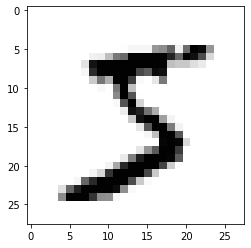

In [82]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(picture.reshape(28,28), cmap='Greys', interpolation='None') #show picture in 2D

In [83]:
picture

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

In [ ]:
#train the neural network

#epchos is the number of times the training data set is used for training
epchos = 10
